# Final Project Submission

Please fill out:
* Student name: Josh Blumer
* Student pace: Self Paced 
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


# Exploratory Data Analysis

## Import Python Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Previewing Available Data Sets

## 1. Box Office Mojo (Studio)

In [183]:
# Import and preview file

bom_movie_gross = 'zippedData/bom.movie_gross.csv.gz'
df2 = pd.read_csv(bom_movie_gross)
df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [184]:
# Explore dataframe metadata

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [185]:
# Inspect studio number of unique values

df2['studio'].nunique()

257

In [186]:
# Inspect domestic gross column for null attributes

df2['domestic_gross'].isnull().sum()

28

In [191]:
# Omit null attributes by only iterating over file containing rows with no null attributes

revised_dg = df2[df2['domestic_gross'].notna()]

In [193]:
# Evaluate changes to metadata

revised_dg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3359 entries, 0 to 3386
Data columns (total 5 columns):
title             3359 non-null object
studio            3356 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2009 non-null object
year              3359 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 157.5+ KB


In [202]:
# Take closer look at number of studios attached to top performing films

top_200 = revised_dg.nlargest(200, ['domestic_gross'])
top_200.head()

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012


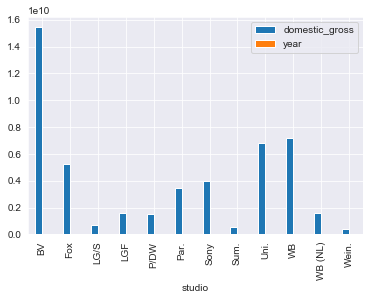

In [233]:
# Plot top 200 grossing films domestic gross sum by studio

top_studios = top_200.sort_values(['studio', 'domestic_gross'], ascending = False).groupby('studio').sum().plot(kind = 'bar')

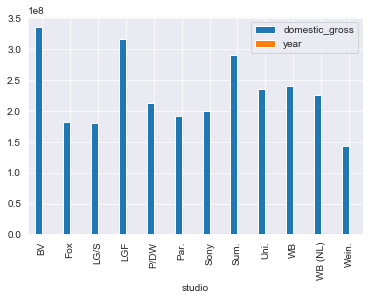

In [296]:
# Plot top 200 grossing films domestic gross mean by studio

top_studios = top_200.sort_values(['studio', 'domestic_gross'], ascending = False).groupby('studio').mean().plot(kind = 'bar')

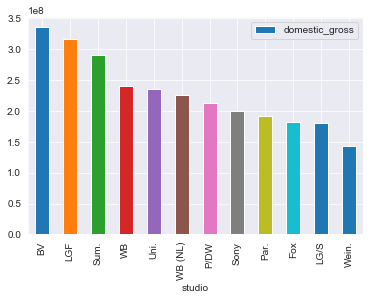

In [297]:
# Visualize top 200 grossing films mean by studio in descending order

top_200[['studio', 'domestic_gross']].groupby('studio').mean().reset_index().sort_values('domestic_gross', ascending = False).plot(kind = 'bar', x = 'studio', y = 'domestic_gross')

## 2. Movie Budgets & Release Date

In [116]:
# Import file and preview 

movie_budgets = 'zippedData/tn.movie_budgets.csv.gz'
df3 = pd.read_csv(movie_budgets)
df3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [27]:
# Explore file shape

df3.shape

(5782, 6)

In [148]:
# Preview meta data

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
foreign_gross        5782 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 316.3+ KB


In [102]:
# Inspect data types

df3.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [117]:
# Write a function to convert currency entries from objects to floats

def convert_currency(val):
    new_val = val.replace(',', '').replace('$', '')
    return float(new_val)

In [119]:
# Pass currency columns through function

df3['production_budget'] = df3['production_budget'].apply(convert_currency)

df3['domestic_gross'] = df3['domestic_gross'].apply(convert_currency)

df3['worldwide_gross'] = df3['worldwide_gross'].apply(convert_currency)

# Check data types to verify change

df3.dtypes


id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

In [282]:
# Preview file change

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 10 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
foreign_gross        5782 non-null float64
profit_difference    5782 non-null float64
profit_quotient      5782 non-null float64
release_month        5782 non-null int64
dtypes: float64(6), int64(2), object(2)
memory usage: 451.8+ KB


In [123]:
# Add foreign_gross column by subtracting domestic_gross from worldwide_gross

df3['foreign_gross'] = (df3['worldwide_gross'] - df3['domestic_gross'])

# Preview file change

df3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08


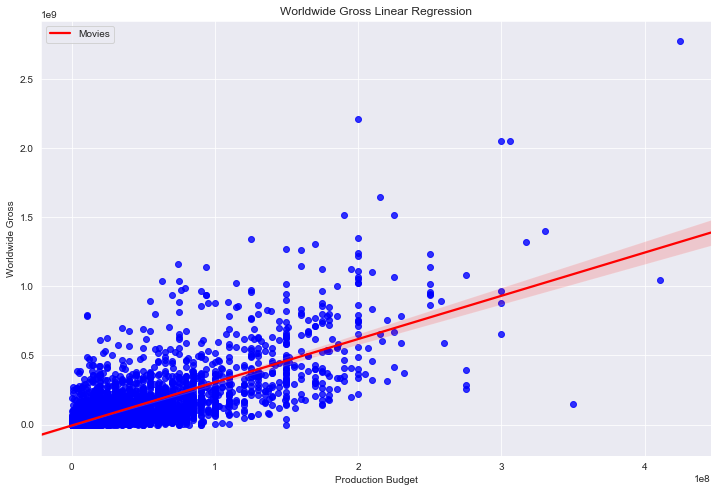

In [284]:
# Plot linear regression between production budget and worldwide gross using Seaborn

f, ax = plt.subplots(figsize=(12,8))
sns.set_style('darkgrid')
sns.regplot(x = 'production_budget', y = 'worldwide_gross', data = df3, scatter_kws = {'color': 'b'}, line_kws = {'color':'red'})
plt.title('Worldwide Gross Linear Regression')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.legend(['Movies'])


In [155]:
# Calculate correlation between production budget and worldwide gross 

df3['production_budget'].corr(df3['worldwide_gross'])

0.7483059765694747

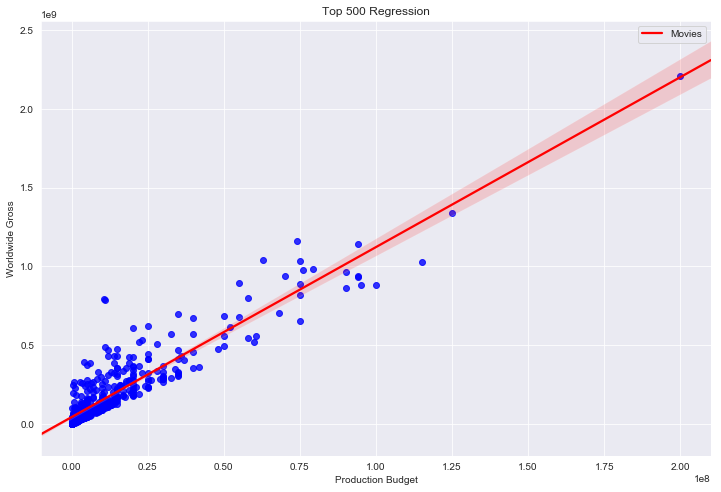

In [307]:
# Plot 500 top grossing movies budget vs worldwide gross

f, ax = plt.subplots(figsize=(12,8))
sns.set_style('darkgrid')
sns.regplot(x = 'production_budget', y = 'worldwide_gross', data = top_500_q, scatter_kws = {'color': 'b'}, line_kws = {'color':'red'})
plt.title('Top 500 Regression')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.legend(['Movies'])

In [308]:
# Check correlation of top 500 grossing films budget vs gross

top_500_q['production_budget'].corr(top_500_q['worldwide_gross'])

0.9216992483317639

In [319]:
# Calculate profit difference by subtracting production budget from worldwide gross

df3['profit_difference'] = (df3['worldwide_gross'] - df3['production_budget'])

# Preview new column

df3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_difference,profit_quotient,release_month,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09,6.532577,11,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,6.350639e+08,2.546673,4,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-2.002376e+08,0.427892,5,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09,4.243841,4,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,9.997217e+08,4.153696,11,9.997217e+08


Text(0, 0.5, 'Profit')

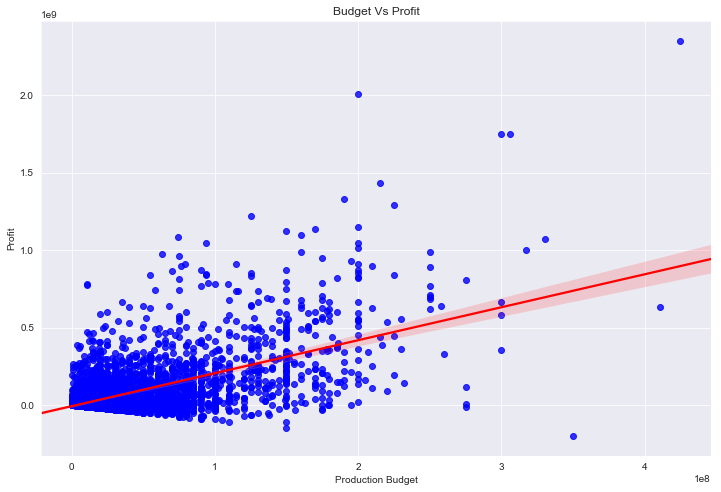

In [317]:
f, ax = plt.subplots(figsize=(12,8))
sns.set_style('darkgrid')
sns.regplot(x = 'production_budget', y = 'profit', data = df3, scatter_kws = {'color': 'b'}, line_kws = {'color':'red'})
plt.title('Budget Vs Profit')
plt.xlabel('Production Budget')
plt.ylabel('Profit')


In [324]:
df3['production_budget'].corr(df3['profit_difference'])

0.6087521471718839

Text(0, 0.5, 'Profit')

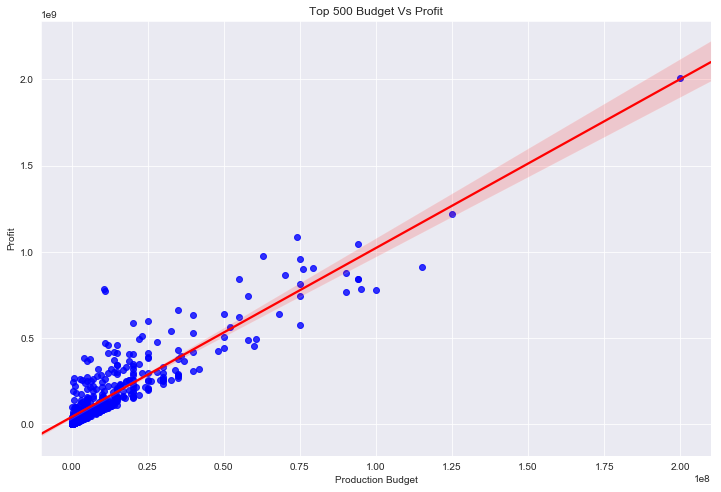

In [321]:
f, ax = plt.subplots(figsize=(12,8))
sns.set_style('darkgrid')
sns.regplot(x = 'production_budget', y = 'profit_difference', data = top_500_q, scatter_kws = {'color': 'b'}, line_kws = {'color':'red'})
plt.title('Top 500 Budget Vs Profit')
plt.xlabel('Production Budget')
plt.ylabel('Profit')

In [323]:
top_500_q['production_budget'].corr(top_500_q['profit_difference'])

0.9071620182851067

In [235]:
# Calculate profit quotient by dividing production budget from worldwide gross

df3['profit_quotient'] = (df3['worldwide_gross'] / df3['production_budget'])

# Preview new column

df3.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_difference,profit_quotient
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,2.351345e+09,6.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,6.350639e+08,2.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,-2.002376e+08,0.427892
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,1.072414e+09,4.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,9.997217e+08,4.153696


In [244]:
# Make list of top 500 profit quotients

top_500_q = df3.nlargest(500, 'profit_quotient')

# Preview list

top_500_q.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,profit_difference,profit_quotient
5745,46,"Jun 30, 1972",Deep Throat,25000.0,45000000.0,45000000.0,0.0,44975000.0,1800.000000
5613,14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,91000000.0,99550000.0,498.750000
5492,93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,86264224.0,193733034.0,431.517853
5679,80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,18892064.0,41556474.0,416.564740
5406,7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,107760901.0,247700000.0,413.833333


In [263]:
# Create month dictionary to view release date column by month only

month_dict = {'Jan': '0', 'Feb': '1', 'Mar': '2', 'Apr': '3', 
              'May': '4', 'Jun': '5', 'Jul': '6', 'Aug': '7', 
              'Sep': '8', 'Oct': '9', 'Nov': '10', 'Dec':'11'}

In [267]:
# Format release date column to read as month abbreviation only

df3['release_month'] = [int(month_dict[i[0:3]]) for i in df3['release_date']]
df3['release_month'].head()

0    11
1     4
2     5
3     4
4    11
Name: release_month, dtype: int64

In [303]:
# Format top 500 dates to read as month abbreviations 

top_500_q['release_month'] = [int(month_dict[i[0:3]]) for i in top_500_q['release_date']]
top_500_q['release_month'].head()

5745    5
5613    2
5492    8
5679    6
5406    6
Name: release_month, dtype: int64

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

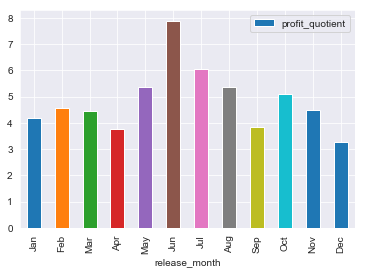

In [269]:
# Plot entire set against profit quotient by month

ax = df3[['release_month', 'profit_quotient']].groupby('release_month').mean().reset_index().sort_values('release_month', ascending = True).plot(kind = 'bar', x = 'release_month', y = 'profit_quotient')

ax.set_xticklabels(month_dict.keys())

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

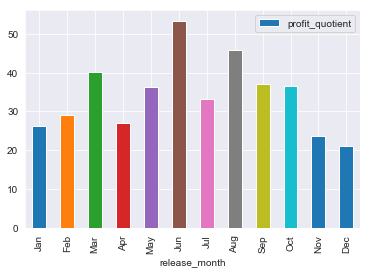

In [310]:
# Plot top 500 against profit quotient by month

ax = top_500_q[['release_month', 'profit_quotient']].groupby('release_month').mean().reset_index().sort_values('release_month', ascending = True).plot(kind = 'bar', x = 'release_month', y = 'profit_quotient')
    
ax.set_xticklabels(month_dict.keys())

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

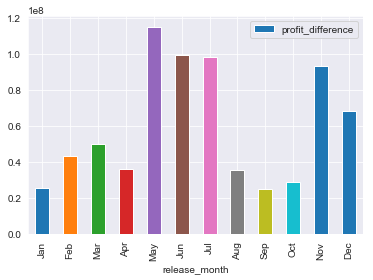

In [285]:
# Plot entire set against profit difference 

ax = df3[['release_month', 'profit_difference']].groupby('release_month').mean().reset_index().sort_values('release_month', ascending = True).plot(kind = 'bar', x = 'release_month', y = 'profit_difference')

ax.set_xticklabels(month_dict.keys())

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

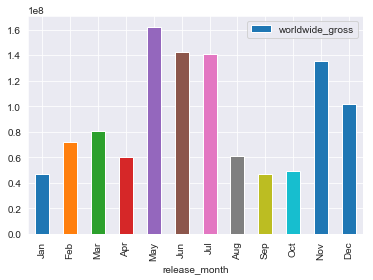

In [286]:
# Plot entire set against worldwide gross

ax = df3[['release_month', 'worldwide_gross']].groupby('release_month').mean().reset_index().sort_values('release_month', ascending = True).plot(kind = 'bar', x = 'release_month', y = 'worldwide_gross')

ax.set_xticklabels(month_dict.keys())

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

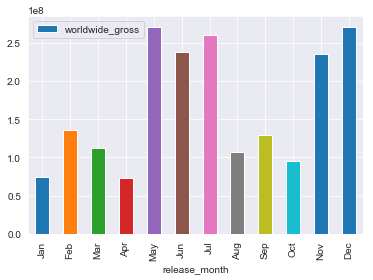

In [305]:
# Plot top 500 against worldwide gross

ax = top_500_q[['release_month', 'worldwide_gross']].groupby('release_month').mean().reset_index().sort_values('release_month', ascending = True).plot(kind = 'bar', x = 'release_month', y = 'worldwide_gross')

ax.set_xticklabels(month_dict.keys())

kaggle_movies = 'users/Ozymandias/downloads/movies.csv'
df6 = pd.read_csv(kaggle_movies)
df6.head()